In [57]:
import pandas as pd
import numpy as np
import collections

data = pd.read_csv("sothebys_historical_data.csv", warn_bad_lines=True, error_bad_lines=False)
print data.columns

Skipping line 225573: expected 18 fields, saw 27



Index([u'Sale Name', u'Sale Date', u'Sale Location', u'Sale Number',
       u'Lot Number', u'Lot Title', u'Lot Description', u'High Estimate',
       u'Low Estimate', u'Price', u'Currency', u'Status', u'Maker',
       u'Image URL', u'Provenance', u'Literature', u'Notes', u'URL'],
      dtype='object')


In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

In [59]:
data['Sale Date'] = pd.to_datetime(data['Sale Date'], format='%m/%d/%Y', errors='coerce')
data.index = data['Sale Date']
data = data.sort('Sale Date')

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [74]:
df = {}
numbers = []

for x in data.columns:
    df[x] = data[pd.notnull(data[x])]
    numbers.append(len(df[x])/float(len(data)))

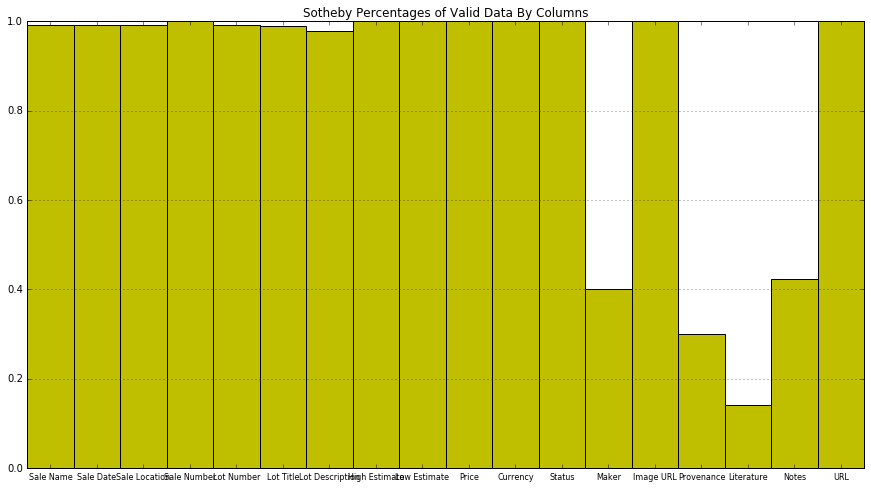

In [76]:
plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(numbers)), numbers, 1.0, color = 'y')
plt.xticks(np.arange(len(numbers)) + 0.5, data.columns, fontsize = 8)
plt.gca().yaxis.grid(True)
plt.title('Sotheby Percentages of Valid Data By Columns')

In [61]:
yearData = data[pd.notnull(data['Sale Date'])]
yearData['Year'] = pd.DatetimeIndex(yearData['Sale Date']).year

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


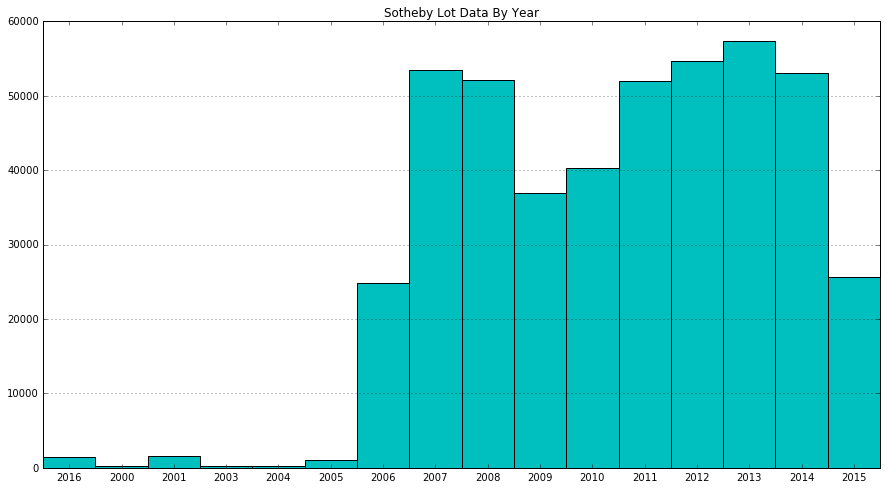

In [79]:
counter = collections.Counter(yearData['Year'])

plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(counter.values())), counter.values(), 1.0, color = 'c')
plt.xticks(np.arange(len(counter.values())) + 0.5, counter.keys())
plt.gca().yaxis.grid(True)
plt.title('Sotheby Lot Data By Year')

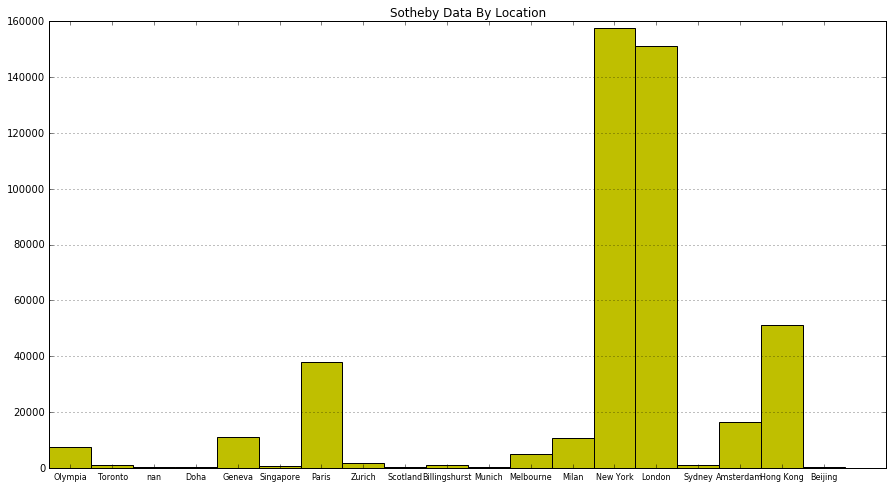

In [63]:
counter = collections.Counter(yearData['Sale Location'])

plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(counter.values())), counter.values(), 1.0, color = 'y')
plt.xticks(np.arange(len(counter.values())) + 0.5, counter.keys(), fontsize = 8)
plt.gca().yaxis.grid(True)
plt.title('Sotheby Data By Location')

In [65]:
counter = collections.Counter(yearData['Image URL'])

print counter.most_common(3)
print sum(sorted(counter.values())[-2:])/float(len(data))

URLDict = dict(counter)
print URLDict['http://www.sothebys.com/content/dam/default/underCopyright.jpg']
print URLDict['http://www.sothebys.com/content/dam/sothebys/default/lot.jpg']

[('http://www.sothebys.com/content/dam/default/underCopyright.jpg', 76144), ('http://www.sothebys.com/content/dam/sothebys/default/lot.jpg', 56211), ('http://www.sothebys.com/content/dam/sothebys-pages/auction-sales-recirc/2014/04/HK0527_auctionlist.jpg', 1600)]
0.288538678201
76144
56211


In [66]:
def getDistinct(data, column):
    return len(list(set(data[column])))

def getPercent(data):
    
    counter = collections.Counter(data['Image URL'])
    URLDict = dict(counter)
    copyrightPage = 0
    lotPage = 0
    
    try:
        copyrightPage = URLDict['http://www.sothebys.com/content/dam/default/underCopyright.jpg']
    except:
        copyrightpage = 0
        
    try:
        lotPage = URLDict['http://www.sothebys.com/content/dam/sothebys/default/lot.jpg']
    except:
        lotPage = 0
    
    if len(data) == 0:
        return 0
    else:
        return (copyrightPage + lotPage)/float(len(data))

df = {}
start = 'year'
saleNumber = []
badPercent = []
number = [x for x in range(2000, 2017)]

for x in number:
    term = start + str(x)
    df[term] = yearData[yearData['Year'] == x]
    saleNumber.append(getDistinct(df[term], 'Sale Name'))
    badPercent.append(getPercent(df[term]))

print saleNumber, badPercent

[1, 3, 0, 4, 3, 3, 73, 192, 205, 167, 184, 185, 162, 188, 161, 109, 5] [1.0, 1.0, 0, 0.15666666666666668, 0.782051282051282, 0.12643678160919541, 0.844768542766206, 0.29622976892132097, 0.3118640813975811, 0.26694100766169426, 0.2938958751891262, 0.36489322781275874, 0.2853434723796293, 0.14399150225503682, 0.12153510093401627, 0.1993686917890963, 0.6858108108108109]


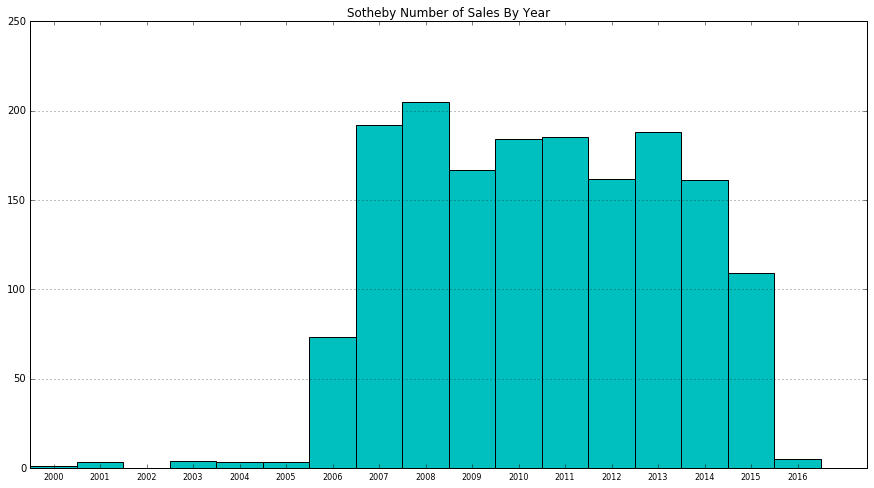

In [80]:
plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(saleNumber)), saleNumber, 1.0, color = 'c')
plt.xticks(np.arange(len(saleNumber)) + 0.5, [x for x in range(2000, 2017)], fontsize = 8)
plt.gca().yaxis.grid(True)
plt.title('Sotheby Number of Sales By Year')

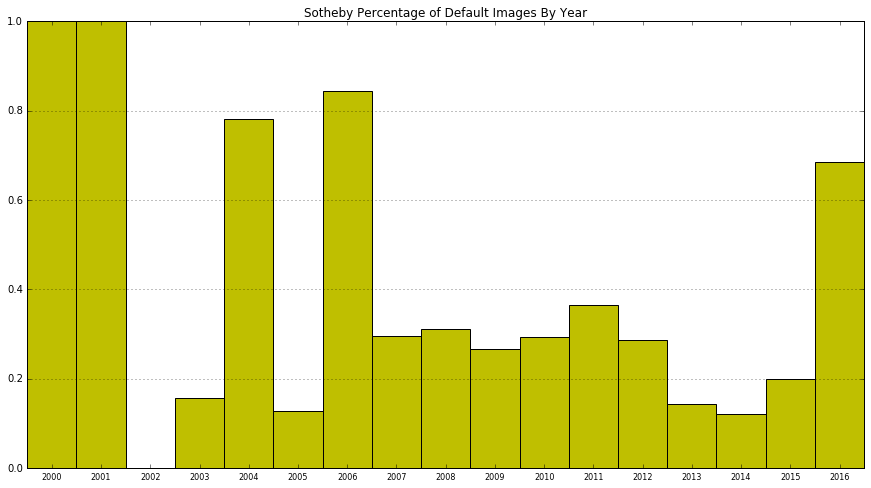

In [81]:
plt.figure(figsize = (15, 8))
plt.bar(np.arange(len(badPercent)), badPercent, 1.0, color = 'y')
plt.xticks(np.arange(len(badPercent)) + 0.5, [x for x in range(2000, 2017)], fontsize = 8)
plt.gca().yaxis.grid(True)
plt.axis([0, 17, 0, 1])
plt.title('Sotheby Percentage of Default Images By Year')

In [122]:
yearData['Month'] = pd.DatetimeIndex(yearData['Sale Date']).month
yearGroup = yearData.groupby(['Year', 'Month']).Month.count()

/Users/gzhao/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


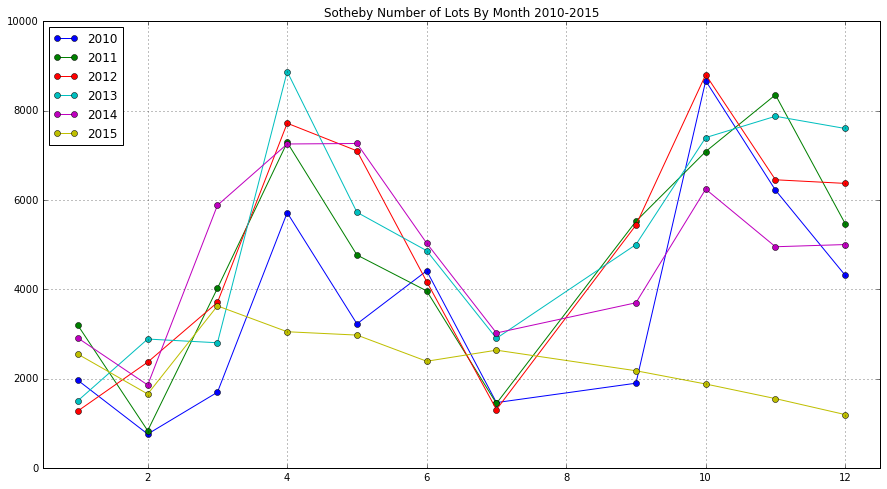

In [163]:
plt.figure(figsize = (15, 8))

for x in sorted(list(set(yearData['Year'])))[9:15]:
    plt.plot(np.array(yearGroup.xs(x).index), np.array(yearGroup.xs(x)), 'o-')
plt.legend(sorted(list(set(yearData['Year'])))[9:15], loc = 'upper left')
plt.grid()
plt.axis([0.5, 12.5, 0, 10000])
plt.title('Sotheby Number of Lots By Month 2010-2015')

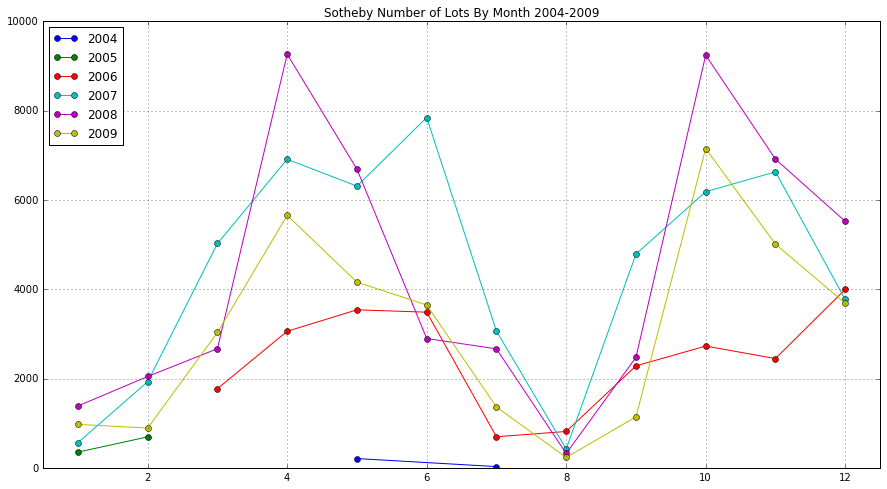

In [168]:
plt.figure(figsize = (15, 8))

for x in sorted(list(set(yearData['Year'])))[3:9]:
    plt.plot(np.array(yearGroup.xs(x).index), np.array(yearGroup.xs(x)), 'o-')
plt.legend(sorted(list(set(yearData['Year'])))[3:9], loc = 'upper left')
plt.grid()
plt.axis([0.5, 12.5, 0, 10000])
plt.title('Sotheby Number of Lots By Month 2004-2009')

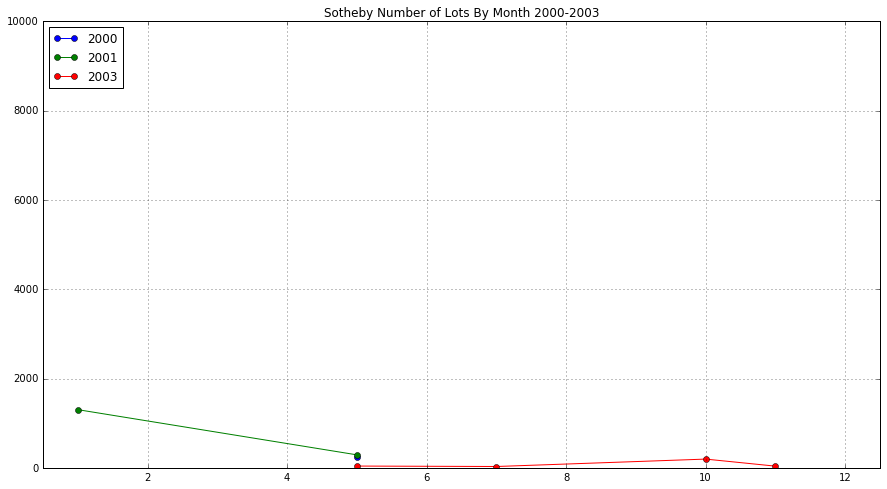

In [167]:
plt.figure(figsize = (15, 8))

for x in sorted(list(set(yearData['Year'])))[:3]:
    plt.plot(np.array(yearGroup.xs(x).index), np.array(yearGroup.xs(x)), 'o-')
plt.legend(sorted(list(set(yearData['Year'])))[:3], loc = 'upper left')
plt.grid()
plt.axis([0.5, 12.5, 0, 10000])
plt.title('Sotheby Number of Lots By Month 2000-2003')

In [149]:
sample = data.sample(n =10)
print np.array(sample['URL'])

[ 'http://www.sothebys.com/en/auctions/ecatalogue/2010/the-greek-sale-l10100/lot.88.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2007/arcade-jewels-n08307/lot.247.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2012/so-baroni-n08857/lot.63.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2008/important-watches-including-property-from-the-time-museum-n08474/lot.103.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2006/20th-century-british-and-irish-art-w06715/lot.104.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2007/african-and-oceanic-art-session-i-various-owners-session-ii-andreas-and-kathrin-lindner-collection-greub-collection-pf7006/lot.126.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2015/arte-moderna-contemporanea-mi0326/lot.57.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2016/finest-and-rarest-wines-hk0648/lot.1359.html'
 'http://www.sothebys.com/en/auctions/ecatalogue/2007/fine-chinese-ceramics-and-works-of-art-n08342/lo